# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [48]:
# your code here
data = []

for i in range(10):
    data.append(random.randint(1,6))

df = pd.DataFrame((data),columns=['outcomes'])

In [50]:
df

,outcomes
0,1
1,6
2,4
3,6
4,1
5,3
6,2
7,2
8,6
9,5


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

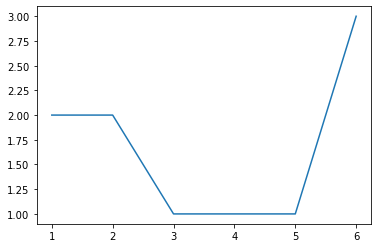

In [54]:
# your code here
df.outcomes.value_counts().sort_index(ascending=False).plot()
#paolo: this is not  sorted by value- check below plus solution

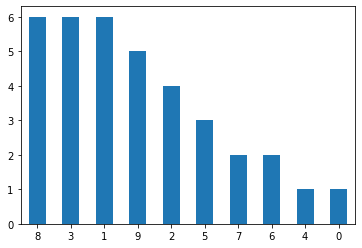

In [55]:
#paolo:plot sorted by value
df.outcomes.sort_values(ascending=False).\
plot(kind='bar', legend=None, rot=0);

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

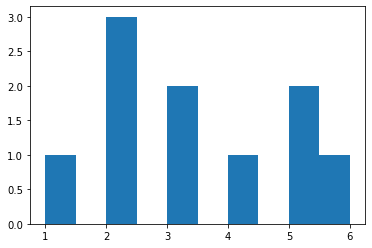

In [4]:
# your code here
plt.hist(df["outcomes"], histtype = 'bar')
plt.show()

In [5]:
"""
It represents exactly the same. As there are no lines drawn within points in the graph it does not suggest information that does not represent actual values. 
"""

'\nIt represents exactly the same. As there are no lines drawn within points in the graph it does not suggest information that does not represent actual values. \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def average(x):
    return sum(x) / len(x)
    
average(data)


{2: 4, 1: 1, 6: 1, 3: 3, 4: 1}

{2: 4, 1: 1, 6: 1, 3: 3, 4: 1}

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def frequency_distribution(x):
    d = {}
    for i in x:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d

distribution = frequency_distribution(data)

distribution_sum = []

for k in sorted(distribution.keys()):
    multiply = (k * distribution[k])
    distribution_sum.append(multiply)
    
sum(distribution_sum)/sum(distribution.keys())


1.5714285714285714

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here

listy = [1, 2, 3, 4, 5, 7, 8 , 9]

def median(x):
    x.sort()
    mid = len(x) // 2
    if not len(x) % 2:
        return (x[mid] + x[~mid]) / 2
    return x[mid]


#Check with built-in functions if all are correct
#paolo: did you check?

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here
def quartiles(x):
    if len(x) // 4 == 0:
        quart = len(x) // 4
        return x[quart], x[quart*2], x[quart*3], x[quart*4]
    if not len(x) // 4 == 0:
        first_quart = ((x[int(0.25*len(x))]) + (x[int(0.25*len(x))+1])) / 2
        middle = median(x)
        second_quart = ((x[int(0.75*len(x))]) + (x[int(0.75*len(x))+1])) / 2
        final_quart = len(x)
        return first_quart, middle, second_quart, x[final_quart-1]
    
quartiles(listy)
quartiles(listy)

(3.5, 4.5, 8.5, 9)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

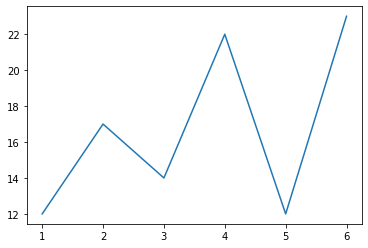

In [12]:
# your code here
df = pd.read_csv('../data/roll_the_dice_hundred.csv')
freq_df = frequency_distribution(df["value"])
plt.plot(*zip(*sorted(freq_df.items())))
plt.show()
#paolo: check the plot I made above with sorted values, this one  is of the same type
#- this one is not the asked type

In [13]:
"""
1's and 5's are less frequently thrown, whereas 4 and 6 seems to be more likely values thrown. There is no sign of a normal distribution. It is hard to estimate the average from this plot.
"""

"\n1's and 5's are less frequently thrown, whereas 4 and 6 seems to be more likely values thrown. There is no sign of a normal distribution. It is hard to estimate the average from this plot.\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here
average(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [15]:
# your code here
frequency_distribution(df['value'])

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

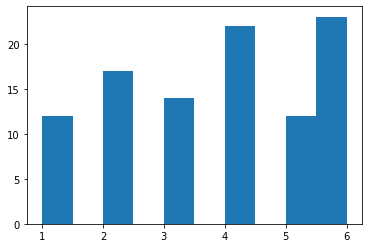

In [16]:
# your code here
plt.hist(df['value'])

In [ ]:
#paolo: yes,this is a good freq. distribution

In [17]:
"""
It is again visible that 1's and 5's are less frequent. By referring to the length of the bars and splitting it in half you are able to estimate the average. 
"""

"\nIt is again visible that 1's and 5's are less frequent. By referring to the length of the bars and splitting it in half you are able to estimate the average. \n"

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

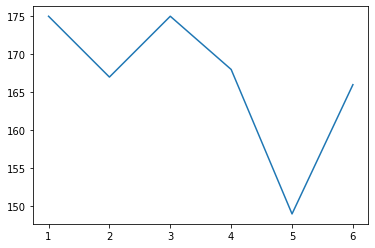

In [18]:
# your code here
df1 = pd.read_csv('../data/roll_the_dice_thousand.csv')
freq_df1 = frequency_distribution(df1["value"])
plt.plot(*zip(*sorted(freq_df1.items())))
plt.show()
#paolo: why this plot- should be histogramme as above for
# frequency distribution. You can plot the histogramme directly from the data
#paolo: also the y axis should go from zero not from 150, like this it is confusing

In [19]:
"""
In this plot the results are very different. 1's are more frequent, and 5's are much less frequent. It again confirms that rolling a dice is not normally distributed.
"""

"\nIn this plot the results are very different. 1's are more frequent, and 5's are much less frequent. It again confirms that rolling a dice is not normally distributed.\n"

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

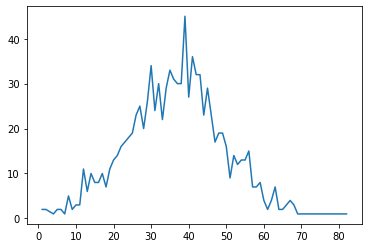

In [20]:
# your code here
df2 = pd.read_csv('../data/ages_population.csv')
freq_df2 = frequency_distribution(df2["observation"])
plt.plot(*zip(*sorted(freq_df2.items())))
plt.show()
#The mean will most likely be around 40, the standard deviation around 10.
#paolo: it is ok like that, you could use histogrammes, notice that here the y axis goes correctly from 0 showing the full range

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [21]:
# your code here
print(average(df2["observation"]), df2["observation"].std())

36.56 12.816499625976762


In [22]:
"""
Yes, they are close to my guesses. However it is not very visible from the graph that the mean is actually 36.56. The graph's highest point is around 40. Howver there are more datapoints on the left that explain why it is lower than 40.
"""

"\nYes, they are close to my guesses. However it is not very visible from the graph that the mean is actually 36.56. The graph's highest point is around 40. Howver there are more datapoints on the left that explain why it is lower than 40.\n"

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

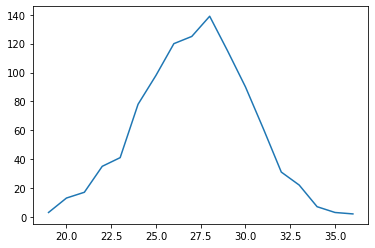

In [23]:
# your code here
df3 = pd.read_csv('../data/ages_population2.csv')
freq_df3 = frequency_distribution(df3["observation"])
plt.plot(*zip(*sorted(freq_df3.items())))
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [24]:
"""
It seems the data is similarly quite normally distributed. The mean is much lower, the std will also be lower as the IQR are smaller too.
"""
#paolo: what about the spread of the values with respect to previous distribution?

'\nIt seems the data is similarly quite normally distributed. The mean is much lower, the std will also be lower as the IQR are smaller too.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [25]:
# your code here
print(average(df3["observation"]), df3["observation"].std())

27.155 2.969813932689186


In [26]:
"""
The mean is lower (almost -10 lower). The standard deviation is much smaller. This dataset most likely represents a subset of the population (a certain age group)
"""

'\nThe mean is lower (almost -10 lower). The standard deviation is much smaller. This dataset most likely represents a subset of the population (a certain age group)\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

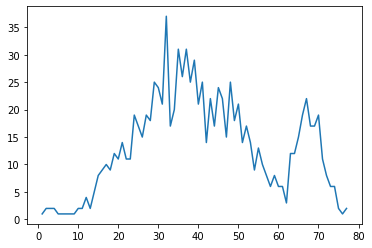

In [27]:
# your code here
df4 = pd.read_csv('../data/ages_population3.csv')
freq_df4 = frequency_distribution(df4["observation"])
plt.plot(*zip(*sorted(freq_df4.items())))
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [28]:
# your code here
print(average(df4["observation"]), df4["observation"].std())

41.989 16.144705959865934


In [29]:
"""
The plot visualizes that due to the number of datapoints on the right side of the top of the distribution, the mean value is more on the right of this peak. the second peak on the right side of this peak explains the large standard deviation. 
"""

'\nThe plot visualizes that due to the number of datapoints on the right side of the top of the distribution, the mean value is more on the right of this peak. the second peak on the right side of this peak explains the large standard deviation. \n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [30]:
# your code here
quartiles(list(df4["observation"]))

(35.5, 40.0, 53.0, 77.0)

In [31]:
"""
From the quartiles it can be confirmed that the median is on the left side of the average (40<41.98).
The wide range between the first and fourth quarter also explain the high SD of this dataset.
"""

'\nFrom the quartiles it can be confirmed that the median is on the left side of the average (40<41.98).\nThe wide range between the first and fourth quarter also explain the high SD of this dataset.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:
# your code here
#pd.qcut(df4['observation'], q=8)
df4.describe(percentiles=[0, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 1])

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
0%,1.000000
12.5%,24.000000
25%,30.000000
37.5%,35.000000
50%,40.000000
62.5%,46.000000


In [33]:
"""
Creating 8 percentiles it becomes visible that the ranges between de first percentiles is larger.
"""

'\nCreating 8 percentiles it becomes visible that the ranges between de first percentiles is larger.\n'

In [56]:
#paolo: good work-check my comments plus solutions

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""